# THE STANFORD OPEN POLICING PROJECT ANALYSIS: 
## If weather conditions have impact on police behavior during traffic stops.

In [3]:
import pandas as pd
weather= pd.read_csv('D:\CSV\weather.csv')
weather

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,USW00014765,2015-12-27,51.0,44,61,9.17,28.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4013,USW00014765,2015-12-28,40.0,30,44,12.30,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,USW00014765,2015-12-29,33.0,28,40,12.53,18.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4015,USW00014765,2015-12-30,30.0,27,35,6.93,15.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  4017 non-null   object 
 1   DATE     4017 non-null   object 
 2   TAVG     1217 non-null   float64
 3   TMIN     4017 non-null   int64  
 4   TMAX     4017 non-null   int64  
 5   AWND     4017 non-null   float64
 6   WSF2     4017 non-null   float64
 7   WT01     1767 non-null   float64
 8   WT02     221 non-null    float64
 9   WT03     224 non-null    float64
 10  WT04     117 non-null    float64
 11  WT05     360 non-null    float64
 12  WT06     25 non-null     float64
 13  WT07     79 non-null     float64
 14  WT08     404 non-null    float64
 15  WT09     69 non-null     float64
 16  WT10     2 non-null      float64
 17  WT11     1 non-null      float64
 18  WT13     1175 non-null   float64
 19  WT14     575 non-null    float64
 20  WT15     6 non-null      float64
 21  WT16     1326 

In [63]:
weather.isnull().sum()

STATION       0
DATE          0
TAVG       2800
TMIN          0
TMAX          0
AWND          0
WSF2          0
WT01       2250
WT02       3796
WT03       3793
WT04       3900
WT05       3657
WT06       3992
WT07       3938
WT08       3613
WT09       3948
WT10       4015
WT11       4016
WT13       2842
WT14       3442
WT15       4011
WT16       2691
WT17       4005
WT18       3672
WT19       4013
WT21       3999
WT22       3985
dtype: int64

In [64]:
# AWND- Average wind speed in miles per hour
# WSF2- Fastest 2-minute wind speed (fastest wind speed during any 2 min period)
weather[['AWND', 'WSF2']].describe()
#chek for trustworthiness: max>avg, min>0

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


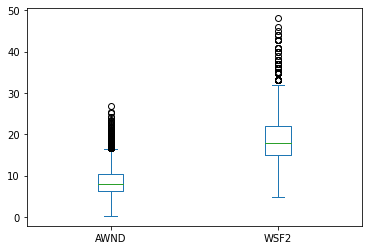

In [65]:
import matplotlib.pyplot as plt
weather[['AWND', 'WSF2']].plot(kind="box")
plt.show()
#box represents 25th percentile to 75th percentile, horizontal lines outside box represent min and max values,
#circles shows outliers.

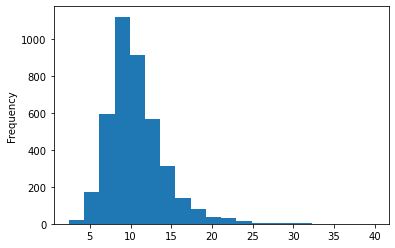

In [66]:
#validating data by checking fastest wind speed values are greater than avg speed for every row.
weather['WDIFF']= weather.WSF2-  weather.AWND
weather.WDIFF.plot(kind="hist", bins=20)
plt.show()
#all values are positive. Difference shows normal distribution, which is for many other natural henomenon, so dataset is valid.

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


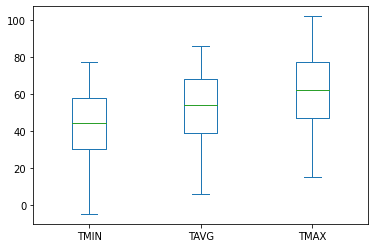

In [67]:
# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Display the plot
plt.show()
# the TAVG values are in between TMIN and TMAX, and the measurements and ranges seem reasonable.

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


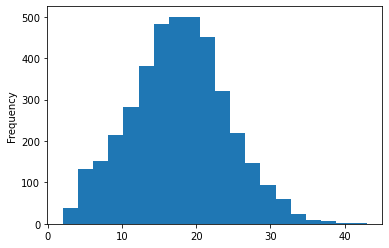

In [68]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF']= weather.TMAX-  weather.TMIN


# Describe the 'TDIFF' column
print(weather['TDIFF'].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind="hist", bins=20)

# Display the plot
plt.show()
# TDIFF column has no negative values and its distribution is approximately normal, 
# both of which are signs that the data is trustworthy.

"how bad" the weather was each day by counting the number of 1 values in each row.

0       2.0
1       2.0
2       3.0
3       4.0
4       4.0
       ... 
4012    1.0
4013    0.0
4014    3.0
4015    2.0
4016    1.0
Name: bad_conditions, Length: 4017, dtype: float64


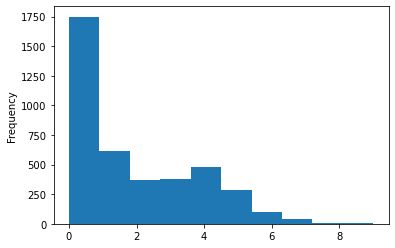

In [69]:
# 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

# WT05 indicates "Hail"
# WT11 indicates "High or damaging winds"
# WT17 indicates "Freezing rain"

# For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day)
# or NaN (meaning the condition was not present).


# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')
print(weather['bad_conditions'])
# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

#### INSIGHT: Total 9 bad weather conditions. Many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.

Rating the weather conditions


In [70]:
# Count the unique values in 'bad_conditions' and sort the index to show count for each bad weather conditions
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad',4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather['rating'].value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


In [71]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
from pandas.api.types import CategoricalDtype
cat_dtype = CategoricalDtype(categories=cats, ordered=True)
weather['rating'] = weather.rating.astype(cat_dtype)

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


In [72]:
ri=pd.read_csv('ri.csv')

In [73]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating=weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

   index       stop_date_time state   stop_date stop_time driver_gender  \
0      0  2005-01-04 12:55:00    RI  2005-01-04     12:55             M   
1      1  2005-01-23 23:15:00    RI  2005-01-23     23:15             M   
2      2  2005-02-17 04:15:00    RI  2005-02-17     04:15             M   
3      3  2005-02-20 17:15:00    RI  2005-02-20     17:15             M   
4      4  2005-02-24 01:20:00    RI  2005-02-24     01:20             F   

  driver_race                   violation_raw  violation  search_conducted  \
0       White  Equipment/Inspection Violation  Equipment             False   
1       White                        Speeding   Speeding             False   
2       White                        Speeding   Speeding             False   
3       White                Call for Service      Other             False   
4       White                        Speeding   Speeding             False   

  search_type   stop_outcome  is_arrested stop_duration  drugs_related_stop  \
0

In [74]:
w = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='inner')
print(w.head())

   index       stop_date_time state   stop_date stop_time driver_gender  \
0      0  2005-01-04 12:55:00    RI  2005-01-04     12:55             M   
1      1  2005-01-23 23:15:00    RI  2005-01-23     23:15             M   
2      2  2005-02-17 04:15:00    RI  2005-02-17     04:15             M   
3      3  2005-02-20 17:15:00    RI  2005-02-20     17:15             M   
4      4  2005-02-24 01:20:00    RI  2005-02-24     01:20             F   

  driver_race                   violation_raw  violation  search_conducted  \
0       White  Equipment/Inspection Violation  Equipment             False   
1       White                        Speeding   Speeding             False   
2       White                        Speeding   Speeding             False   
3       White                Call for Service      Other             False   
4       White                        Speeding   Speeding             False   

  search_type   stop_outcome  is_arrested stop_duration  drugs_related_stop  \
0

In [75]:
# Examine the shape of 'ri'
print(ri.shape)
# print(weather.index[:5])
# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_date_time', inplace=True)
print(ri_weather['rating'].isnull().sum())

(91741, 18)
(91741, 20)
0


Do police officers arrest drivers more often when the weather is bad?

In [79]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())
arrest_rate= ri_weather.groupby(['violation', 'rating']).is_arrested.mean()
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

0.09025408486936048
rating
good     0.086842
bad      0.090479
worse    0.106527
Name: is_arrested, dtype: float64
violation            rating
Equipment            good      0.058995
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076923
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013404
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


#### INSIGHT: The arrest rate increases as the weather gets worse, and that trend persists across many of the violation types.

In [80]:
# Can use any of these 2 methods :
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.058995  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076923  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013404  0.013314  0.016886
rating                   good       bad     worse
violation                                        
Equipment            0.058995  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076923  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013404  0.013314  0.016886
